In [1]:
from torchvision import datasets
import torch
from torchvision import transforms
import os
import pandas as pd
import load_without_faces
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def save_recon(data):
    inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],std=[1/0.229, 1/0.224, 1/0.225])

    #fig,ax = plt.subplots(1)
    #ax.set_aspect('equal')

    # obtain one batch of training images
    #dataiter = iter(valloader)
    #images, labels = dataiter.next()
    data = data.detach().cpu()
    data= data.squeeze(0)

    fig = plt.figure(figsize=(30, 20))
    # display 20 images
    for idx in np.arange(10):
        ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[])
        im = inv_normalize(data[idx])
        ax.imshow(im.permute(1, 2, 0))

    for idx in range(10,20):
        ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
        im = inv_normalize(data[idx])
        ax.imshow(im.permute(1, 2, 0))
        
    for idx in range(20,30):
        ax = fig.add_subplot(3, 10, idx+1, xticks=[], yticks=[])
        im = inv_normalize(data[idx])
        ax.imshow(im.permute(1, 2, 0))

   # plt.savefig(f'{curr_dir}/Results/recons/{model_type}_{train_cond}_{epoch}_reconstruction.png', bbox_inches='tight', pad_inches = 0, dpi=200)

In [3]:
transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])

inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],std=[1/0.229, 1/0.224, 1/0.225])

In [4]:
image_dir = "/lab_data/behrmannlab/image_sets/imagenet_objects/val"
exclude_im = f"/lab_data/behrmannlab/image_sets/imagenet_face_files.csv"
exclude_folder = f"/lab_data/behrmannlab/image_sets/imagenet_animal_classes.csv"
all_classes = os.listdir(image_dir)


In [5]:
no_faces = load_without_faces.load_stim(image_dir,exclude_im, exclude_folder, transform=transform)
    

                                  url
0      n09229709/n09229709_28517.JPEG
1      n03017168/n03017168_12378.JPEG
2  test/ILSVRC2012_test_00082490.JPEG
3        n02669723/n02669723_793.JPEG
4       n03538406/n03538406_1514.JPEG


/lab_data/behrmannlab/image_sets/imagenet_objects/val/n03891251/ILSVRC2012_val_00032376.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n07745940/ILSVRC2012_val_00002412.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n04067472/ILSVRC2012_val_00010458.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n02950826/ILSVRC2012_val_00021004.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n07697313/ILSVRC2012_val_00037389.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n07714571/ILSVRC2012_val_00040469.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n07875152/ILSVRC2012_val_00030875.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n03197337/ILSVRC2012_val_00037047.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n04389033/ILSVRC2012_val_00032496.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n03146219/ILSVRC2012_val_00036983.JPEG
/lab_data/behrmannlab/image_sets/imagenet_objects/val/n03532672/ILSVRC

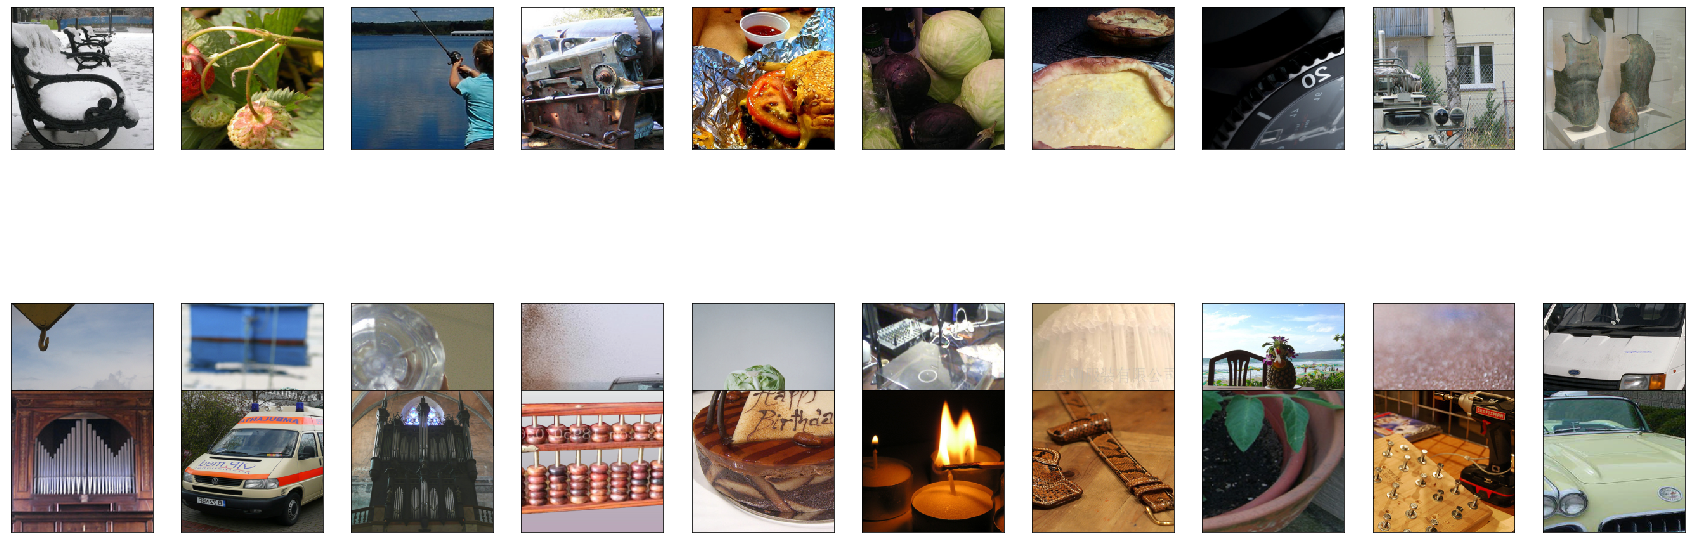

In [9]:
valloader = torch.utils.data.DataLoader(no_faces, batch_size=30, shuffle = True)
inputs, classes = next(iter(valloader))   
save_recon(inputs)

In [ ]:
fig = plt.figure()

for im, labe in range(len(no_faces)):
    sample, label = no_faces[i]

    #print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

In [26]:
main_dir = image_dir

all_classes = os.listdir(main_dir)


#load files to exclude
exclude_ims = pd.read_csv(exclude_ims)
exclude_ims = set(exclude_ims['url'])

#exclude certain folders

imgs =[]
class_label =[]
ii = 0
for im_folder in all_classes:
    curr_ims = [os.path.join(im_folder,file) for file in os.listdir(os.path.join(main_dir, im_folder))]
    curr_ims = set(curr_ims)
    final_ims = list(curr_ims - exclude_ims)

    imgs += final_ims
    class_label += [ii] *len(final_ims)
    ii += 1

final_imgs = imgs
samples = class_label

In [30]:
samples[700]

14

In [31]:
img_loc = os.path.join(main_dir, final_imgs[700])

In [32]:
img_loc

'/lab_data/behrmannlab/image_sets/imagenet_objects/validation/n03450230/ILSVRC2012_val_00018276.JPEG'

In [35]:
image = Image.open(img_loc).convert("RGB")

In [37]:
image.imshow()

AttributeError: 'Image' object has no attribute 'imshow'

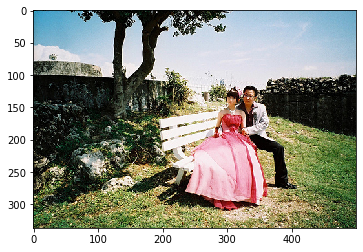

In [39]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
image = Image.open(img_loc).convert("RGB")
imshow(np.asarray(image))